### Loading the dataset into Python enviornment

In [1]:
#import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Libraries for data visualization
import matplotlib.pyplot as plt  
import seaborn as sns 
from pandas.plotting import scatter_matrix
from collections import Counter
def printmd(string):
    display(Markdown(string))


# Import sys and warnings to ignore warning messages 
import sys
import warnings
%matplotlib inline

if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Objective



The goal here is to understand the dataset and predict if the salary is less than 50k or greater than 50k

Explanation of the variables of the dataset

age : continuous.

workclass: a general term to represent the employment status of an individual,Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

education: Preschool , 1st-4th , 5th-6th , 7th-8th , 9th , 10th , 11th , 12th , HS-grad , Prof-school , Assoc-acdm , Assoc-voc , Some-college , Bachelors , Masters , Doctorate

education-num: a number that describe your education status from preschool to doctorate. marital-status: marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces.Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: represents what this individual is relative to other Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: <=50K or >50K


In [2]:
data=pd.read_csv(r'C:\Users\HATPL\Downloads\salarydata.csv')

In [3]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### Understanding the dataset

In [5]:
data.shape

(32561, 14)

In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [7]:
def data_info(data):
    print('Number of Columns in the dataset: ',data.shape[1])
    print('Number of rows in the dataset: ',data.shape[0])
    print('Total number of datapoints in the dataset:',data.size)
    numerical_features = [f for f in data.columns if data[f].dtypes!='O']
    print('Count of Numerical Features:',len(numerical_features))
    cat_features = [c for c in data.columns if data[c].dtypes=='O']
    print('Count of Categorical Features:',len(cat_features))
data_info(data)

Number of Columns in the dataset:  14
Number of rows in the dataset:  32561
Total number of datapoints in the dataset: 455854
Count of Numerical Features: 5
Count of Categorical Features: 9


In [8]:
def unique_checker(data):
    """loops and prints unique values in each column"""
    for col in data.columns:
        print("Unique values in {} feature.".format(col))
        print(data[col].unique(),"\n")
        print("*"*40)

In [9]:
unique_checker(data) #scroll / toggle output to view all outputs

# Note:
## this step is just for the Data Understanding part
### Not intergral to the straightforward analysis 

Unique values in age feature.
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

****************************************
Unique values in workclass feature.
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

****************************************
Unique values in education feature.
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

****************************************
Unique values in education-num feature.
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

****************************************
Unique values in marital-status feature.
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separat

In [10]:
def count_checker(data):
    """count of each value under each feature in the data"""
    for col in data.columns:
        print("Count for each category of values in {} feature.".format(col))
        print(data[col].value_counts(),"\n")
        print("*"*40)

In [11]:
count_checker(data) #scroll / toggle output to view all outputs
# Note:
## this step is just for the Data Understanding part
### Not intergral to the straightforward analysis 

Count for each category of values in age feature.
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64 

****************************************
Count for each category of values in workclass feature.
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64 

****************************************
Count for each category of values in education feature.
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool   

In [12]:
#creating a Dataframe from the given dataset
df = pd.DataFrame(data)
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

### Renaming the columns

In [13]:

#replacing some special character columns names with proper names 
df.rename(columns={'capital-gain': 'capital_gain', 'capital-loss': 'capital_loss', 'native-country': 'country','hours-per-week': 'hours_per_week','marital-status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'country', 'salary'],
      dtype='object')

### Data Cleaning

### 1. Missing Values

In [14]:
 #check the missing value
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital           0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
salary            0
dtype: int64

**Above sum shows there are no null values in the dataset.**

In [15]:
#we can see that there are some special characters in the data like ‘?’.
#Finding the special characters in the data frame
df.isin(['?']).sum(axis=0)

age                  0
workclass         1836
education            0
education-num        0
marital              0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
country            583
salary               0
dtype: int64

**Findings**

- we see that there is a special character as " ?" for columns workcalss, Occupation, and country, we need to clean those data. 
- In this case, as the missing value fall into the categorical features, we will use the pandas DataFrame mode() method to fill the missing value.

In [16]:
#Handling missing values
# the code will replace the special character to nan  
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)



In [17]:

df.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital              0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
country            583
salary               0
dtype: int64

In [18]:
#we will use the pandas DataFrame mode() method to fill the missing value.
df = df.fillna(df.mode().iloc[0])

In [19]:
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital           0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
salary            0
dtype: int64

### 2. Remove duplicate data 

In [20]:
#Checking for duplicated entries
sum(df.duplicated(df.columns))

3591

In [21]:
#Delete the duplicates and check that it worked
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

In [22]:
df.shape

(28970, 14)

In [23]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'country', 'salary'],
      dtype='object')

### 3. Handling Outliers

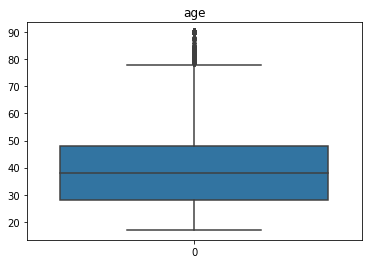

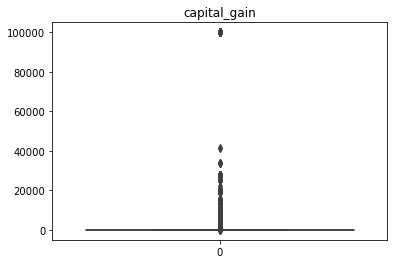

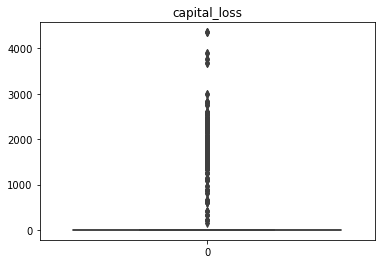

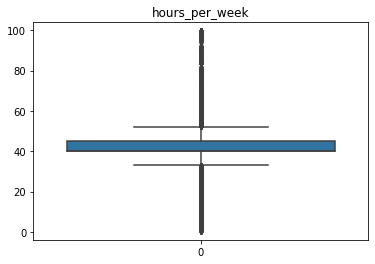

In [24]:
## checking outliers
for i in ['age',
       'capital_gain','capital_loss','hours_per_week'] :
    plt.title(i)
    sns.boxplot(data=df[i])
    plt.show()  


In [25]:
#df1=df
#df1.head()

### Handling Outliers with age

In [26]:
q1 = np.percentile(df['age'],25,interpolation='midpoint')
q3 = np.percentile(df['age'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df['age'][(df['age']<low_limit)|(df['age']>high_limit)].index
df.drop(index,inplace=True)

### Handling Outliers with hours_per_week

In [27]:
q1 = np.percentile(df['hours_per_week'],25,interpolation='midpoint')
q3 = np.percentile(df['hours_per_week'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df['hours_per_week'][(df['hours_per_week']<low_limit)|(df['hours_per_week']>high_limit)].index
df.drop(index,inplace=True)

### 5. Exploratory Data analysis

### 6. Feature Reduction 

- While analyzing the dataset, 
- As we can see in 'descriptive statistics - Numerical columns',
    - 'capital-gain'and 'capital-loss' both columns have 75% data as 0.00
            - So, we can drop 'capital-gain'& 'capital-loss' both columns. 
- The column,education-num is the numerical version of the column education, so we also drop it.

In [28]:
df.drop(['capital_gain','capital_loss','education-num'], axis = 1,inplace = True)
df.head()

,age,workclass,education,marital,occupation,relationship,race,sex,hours_per_week,country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [29]:
df.shape

(20468, 11)

In [30]:
df.tail()

,age,workclass,education,marital,occupation,relationship,race,sex,hours_per_week,country,salary
32555,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,>50K


Now, we need to convert the categorical values to numeric for modeling. Looking at the Marital-status col, there are nearly 6 different values which would mean the same as two values of being married ot no married, therefore we convert them into only two values.

In [31]:
df.replace(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent','Never-married','Separated','Widowed'],
             ['divorced','married','married','married','not married','not married','not married'], inplace = True)

In [32]:
df['marital'].value_counts()

married        9946
not married    7246
divorced       3276
Name: marital, dtype: int64

### 7. Data visualization

### Univariate Analysis

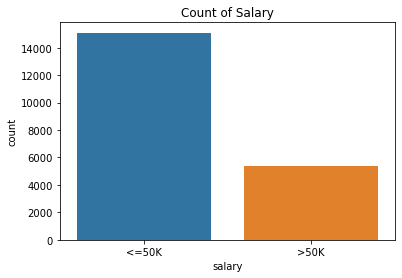

In [33]:
#Countplot of salary
sns.countplot(x=df['salary'])
plt.title('Count of Salary')
plt.show()

Majority of the people are having the salary less than or equal to 50k.Only some employees are well paid.
25% people have salary above 50k and 75% below 50k, this indicated that we have imbalanced data.


In [34]:
df['salary'].value_counts()



<=50K    15092
>50K      5376
Name: salary, dtype: int64

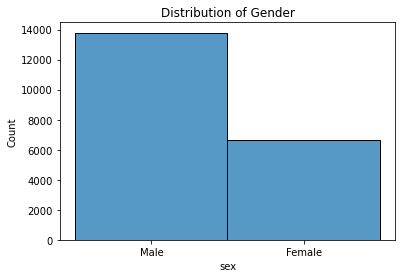

In [35]:
#Distribution of gender
sns.histplot(x=df['sex'])
plt.title('Distribution of Gender')
plt.show()





This dataset contains more information about male employees than females.

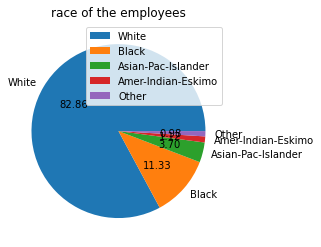

In [36]:
#pieplot of race of the employees

plt.pie(x=df["race"].value_counts(),labels=['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo','Other'],autopct='%.2f')
plt.title('race of the employees')
plt.legend()
plt.show()

Around 85% of the total employees are white.


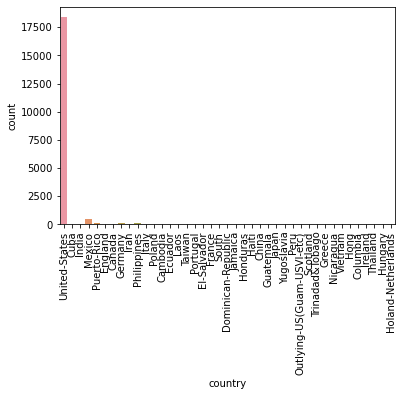

In [37]:
#Countplot of Native country
sns.countplot(x=df['country'])
plt.xticks(rotation=90)
plt.show()

More than 95% of the employees belongs to United states

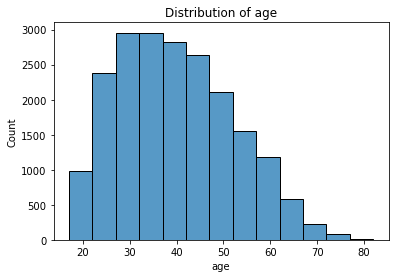

In [38]:
#Distribution of Age


sns.histplot(df['age'],binwidth=5)
plt.title('Distribution of age')
plt.show()

Most of the employees are in between 30 and 40 years but few employees are above 80 years

In [39]:
#Bivariate Analysis


In [40]:
#Countplot of occupation vs salary

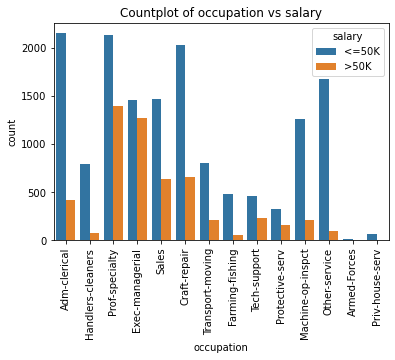

In [41]:
sns.countplot(x=df['occupation'],hue=df['salary'])
plt.title('Countplot of occupation vs salary')
plt.xticks(rotation=90)
plt.show()

In each category,most of the employees are getting the income below 50 k .But we can see a good number of higher income in the case of Exec-managerial field.


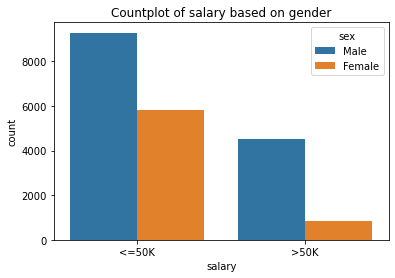

In [42]:
#Countplot of salary based on gender

sns.countplot(x=df['salary'],hue=df['sex'])
plt.title('Countplot of salary based on gender')
plt.show()


Majority of the females are having lesser income than 50k .Very few females are getting the salary above 50k when compared to the males.


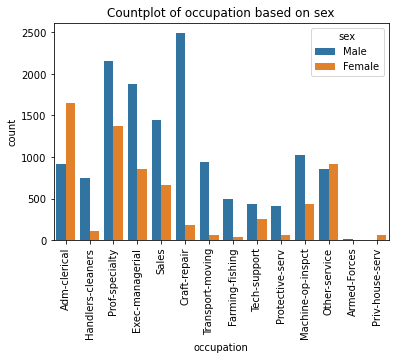

In [43]:
#countplot of occupation vs sex

sns.countplot(x=df['occupation'],hue=df['sex'])
plt.title('Countplot of occupation based on sex')
plt.xticks(rotation=90)
plt.show()

In some of the categories,males are more active while females are dominant in Admin-Clerical,other services,priv-house-serv occupations

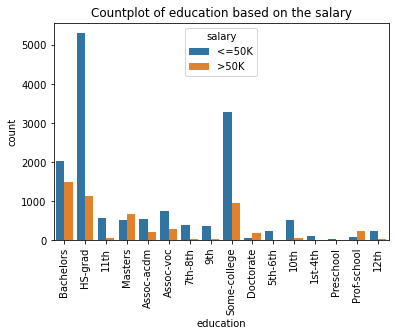

In [44]:
#Countplot of education vs salary

sns.countplot(x=df['education'],hue=df['salary'])
plt.title('Countplot of education based on the salary')
plt.xticks(rotation=90)
plt.show()


Most of the employess having HS-Graduation,Bachelors,some college,Assoc-acdm,Assoc-voc,higher secondary,high school,primary and preschool education are paid less than 50k while the others with Masters,Doctorate,Prof-school are having higher income greater than 50k


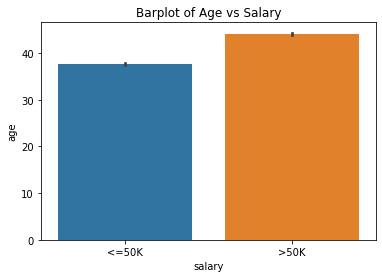

In [45]:
#Barplot of age vs salary

sns.barplot(y=df['age'],x=df['salary'])
plt.title('Barplot of Age vs Salary')
plt.show()

People of age less than 40 years are paid less than 50k when compared to those who are above 40 years

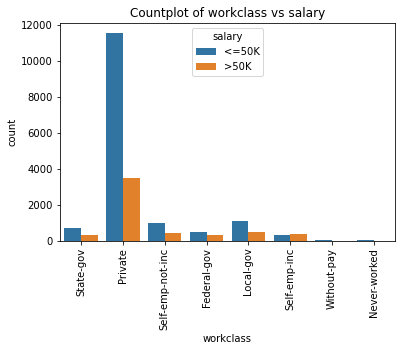

In [46]:
#Countplot of workclass vs salary
sns.countplot(x=df['workclass'],hue=df['salary'])
plt.title('Countplot of workclass vs salary')
plt.xticks(rotation=90)
plt.show()

Majority of the people are private employees.Very less people had no prior work experience.But only self-emp-inc are getting the income greater than 50k.


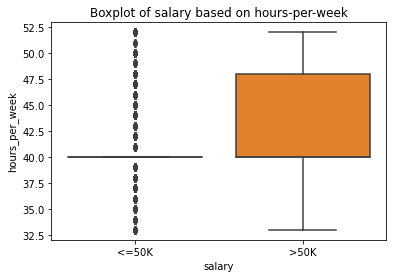

In [47]:
#Boxplot of salary based on hours-per-week

sns.boxplot(x=df['salary'],y=df['hours_per_week'])
plt.title('Boxplot of salary based on hours-per-week')
plt.show()


Those who are working above 40 hours per week are getting the salary above 50k while the others working below 40 hours are paid less than 50k
 


## 8. Feature Engineering

In [48]:
# education Category
df.education= df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
df.education = df.education.replace('HS-grad', 'high school')
df.education = df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
df.education = df.education.replace('Bachelors', 'undergrad')
df.education = df.education.replace('Masters', 'grad')
df.education = df.education.replace('Doctorate', 'doc')

In [49]:
# Salary
df.Salary = df.salary.replace('<=50K', 0)
df.Salary = df.salary.replace('>50K', 1)

In [50]:
df.corr()

,age,hours_per_week
age,1.000000,0.036539
hours_per_week,0.036539,1.000000


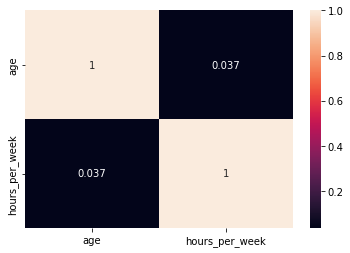

In [51]:
sns.heatmap(df.corr(), annot=True);

In [52]:
# Salary
df.Salary = df.Salary.replace( 0,'<=50K')
df.Salary = df.Salary.replace( 1,'>50K')

In [53]:
df['salary'].value_counts()

<=50K    15092
>50K      5376
Name: salary, dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20468 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             20468 non-null  int64 
 1   workclass       20468 non-null  object
 2   education       20468 non-null  object
 3   marital         20468 non-null  object
 4   occupation      20468 non-null  object
 5   relationship    20468 non-null  object
 6   race            20468 non-null  object
 7   sex             20468 non-null  object
 8   hours_per_week  20468 non-null  int64 
 9   country         20468 non-null  object
 10  salary          20468 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.9+ MB


In [55]:
#Covert workclass Columns Datatype To Category Datatype
df['workclass'] = df['workclass'].astype('category')

## 9. Encoding

In [56]:
df.columns

Index(['age', 'workclass', 'education', 'marital', 'occupation',
       'relationship', 'race', 'sex', 'hours_per_week', 'country', 'salary'],
      dtype='object')

In [57]:
unique_checker(df)

Unique values in age feature.
[39 38 53 28 37 52 31 42 30 32 40 34 25 43 35 59 56 23 20 45 48 24 49 57
 44 41 29 27 33 76 47 36 22 19 46 61 70 64 21 51 26 58 60 54 50 66 65 55
 77 63 17 62 67 72 69 18 73 71 78 75 68 74] 

****************************************
Unique values in workclass feature.
['State-gov', 'Private', 'Self-emp-not-inc', 'Federal-gov', 'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked']
Categories (8, object): ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'] 

****************************************
Unique values in education feature.
['undergrad' 'high school' 'school' 'grad' 'higher' 'doc'] 

****************************************
Unique values in marital feature.
['not married' 'divorced' 'married'] 

****************************************
Unique values in occupation feature.
['Adm-clerical' 'Handlers-cleaners' 'Prof-specialty' 'Exec-managerial'
 'Sales' 'Craft-repair' 'Transport

### Label Encoding

In [58]:
#label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric 
df['workclass']  = le.fit_transform(df['workclass'])
df['education']  = le.fit_transform(df['education'])
df['occupation']  = le.fit_transform(df['occupation'])
df['relationship']  = le.fit_transform(df['relationship'])
df['race']  = le.fit_transform(df['race'])
df['country']  = le.fit_transform(df['country'])
df['marital']  = le.fit_transform(df['marital'])
df['sex']  = le.fit_transform(df['sex'])

In [59]:
df.head()

,age,workclass,education,marital,occupation,relationship,race,sex,hours_per_week,country,salary
0,39,6,5,2,0,1,4,1,40,38,<=50K
2,38,3,2,0,5,1,4,1,40,38,<=50K
3,53,3,4,1,5,0,2,1,40,38,<=50K
4,28,3,5,1,9,5,2,0,40,4,<=50K
5,37,3,1,1,3,5,4,0,40,38,<=50K


In [60]:
df.tail()

,age,workclass,education,marital,occupation,relationship,race,sex,hours_per_week,country,salary
32555,22,3,3,2,10,1,4,1,40,38,<=50K
32556,27,3,3,1,12,5,4,0,38,38,<=50K
32557,40,3,2,1,6,0,4,1,40,38,>50K
32558,58,3,2,2,0,4,4,0,40,38,<=50K
32560,52,4,2,1,3,5,4,0,40,38,>50K


## 9. Model Development & Classification

In [61]:
#Moved the salary column to another variable
df_target = df.pop('salary')
df.head()

,age,workclass,education,marital,occupation,relationship,race,sex,hours_per_week,country
0,39,6,5,2,0,1,4,1,40,38
2,38,3,2,0,5,1,4,1,40,38
3,53,3,4,1,5,0,2,1,40,38
4,28,3,5,1,9,5,2,0,40,4
5,37,3,1,1,3,5,4,0,40,38


### Logistic Regression Model

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [63]:
#since this is a binary classification we will use logistic reg

#normalizing data
scaler = StandardScaler()
df2 = scaler.fit_transform(df.values)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(df2, df_target,test_size=0.2, random_state=42)

clf = LogisticRegression().fit(x_train,y_train)
clf

LogisticRegression()

In [65]:
clf.score(x_test,y_test)

0.7447484123106985

In [66]:
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

       <=50K       0.77      0.94      0.84      3021
        >50K       0.53      0.20      0.30      1073

    accuracy                           0.74      4094
   macro avg       0.65      0.57      0.57      4094
weighted avg       0.71      0.74      0.70      4094



In [67]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy for Logistic Regression is",round(accuracy_score(y_test,clf.predict(x_test)),4))
print("Precision for Logistic Regression is",round(precision_score(y_test,clf.predict(x_test),average='macro'),4))
print("Recall for Logistic Regression is",round(recall_score(y_test,clf.predict(x_test),average='macro'),4))
print("F1-Score for Logistic Regression is",round(f1_score(y_test,clf.predict(x_test),average='macro'),4))

Accuracy for Logistic Regression is 0.7447
Precision for Logistic Regression is 0.6512
Recall for Logistic Regression is 0.5704
F1-Score for Logistic Regression is 0.5697


In [68]:
y_pred1 = clf.predict(x_test)

Text(33.0, 0.5, 'Actual Labels')

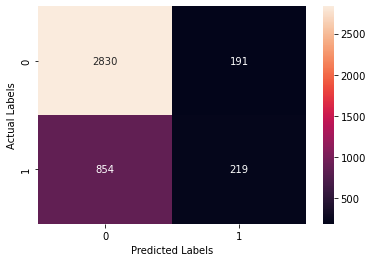

In [69]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

### Support Vector Classifier

In [70]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy on training data is:',svc.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.7372053255160621
Accuracy is: 0.7379091353199805
Precision is: 0.5445098919886812
Recall is: 0.7379091353199805
f1 score is: 0.6266264224319497
              precision    recall  f1-score   support

       <=50K       0.74      1.00      0.85      3021
        >50K       0.00      0.00      0.00      1073

    accuracy                           0.74      4094
   macro avg       0.37      0.50      0.42      4094
weighted avg       0.54      0.74      0.63      4094

[[3021    0]
 [1073    0]]


### Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print('Accuracy on training data is:',dt_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.9601807743984365
Accuracy is: 0.7457254518808012
Precision is: 0.7411748919563175
Recall is: 0.7457254518808012
f1 score is: 0.7432765959619674
              precision    recall  f1-score   support

       <=50K       0.82      0.84      0.83      3021
        >50K       0.52      0.49      0.50      1073

    accuracy                           0.75      4094
   macro avg       0.67      0.66      0.67      4094
weighted avg       0.74      0.75      0.74      4094

[[2531  490]
 [ 551  522]]


### KNN Model

In [72]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
n_neighbors=np.arange(2,18)
for i in n_neighbors:
  knn_model=KNeighborsClassifier(n_neighbors=i,metric='minkowski')
  knn_model.fit(x_train,y_train)
  y_pred=knn_model.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  acc_values.append(acc)

Text(0, 0.5, 'Accuracy values')

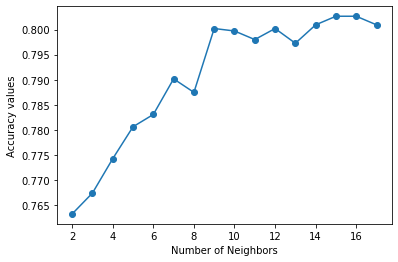

In [73]:
plt.plot(n_neighbors,acc_values,'o-')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy values')

In [74]:
knn_model=KNeighborsClassifier(n_neighbors=7,metric='minkowski')
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
print('Accuracy on training data is:',knn_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.835287651154269
Accuracy is: 0.790180752320469
Precision is: 0.7816159762148495
Recall is: 0.790180752320469
f1 score is: 0.7845568125804867
              precision    recall  f1-score   support

       <=50K       0.84      0.88      0.86      3021
        >50K       0.62      0.53      0.57      1073

    accuracy                           0.79      4094
   macro avg       0.73      0.71      0.71      4094
weighted avg       0.78      0.79      0.78      4094

[[2670  351]
 [ 508  565]]


### Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
print('Accuracy on training data is:',rf_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.9601807743984365
Accuracy is: 0.7872496336101612
Precision is: 0.7786949849611632
Recall is: 0.7872496336101612
f1 score is: 0.7817105338046585
              precision    recall  f1-score   support

       <=50K       0.84      0.88      0.86      3021
        >50K       0.61      0.52      0.56      1073

    accuracy                           0.79      4094
   macro avg       0.72      0.70      0.71      4094
weighted avg       0.78      0.79      0.78      4094

[[2662  359]
 [ 512  561]]


# Gradient Boosting

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print('Accuracy on training data is:',rf_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.9601807743984365
Accuracy is: 0.8229115779189057
Precision is: 0.815303298284436
Recall is: 0.8229115779189057
f1 score is: 0.816757586785598
              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.88      3021
        >50K       0.70      0.57      0.63      1073

    accuracy                           0.82      4094
   macro avg       0.78      0.74      0.76      4094
weighted avg       0.82      0.82      0.82      4094

[[2757  264]
 [ 461  612]]


### Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
model = GaussianNB()
gnb = model.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print('Accuracy on training data is:',rf_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.9601807743984365
Accuracy is: 0.7410845139228138
Precision is: 0.762952711513866
Recall is: 0.7410845139228138
f1 score is: 0.7491540193603919
              precision    recall  f1-score   support

       <=50K       0.85      0.78      0.82      3021
        >50K       0.50      0.63      0.56      1073

    accuracy                           0.74      4094
   macro avg       0.68      0.70      0.69      4094
weighted avg       0.76      0.74      0.75      4094

[[2363  658]
 [ 402  671]]


In [78]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
clf.score(x_test, y_test)

0.8194919394235467

From the graph, its clear that there is an imbalance problem . Models do not fit well when there is a class imbalance. There are some methods like oversampling, undersampling and mixture. I will do class oversampling using SMOTE(Synthetic Minority Oversampling Technique). It creates new samples along the lines of the existing samples

## Sampling

In [79]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [80]:
 from imblearn.over_sampling import SMOTE

In [81]:
oversample=SMOTE()
x,y=oversample.fit_resample(df,df_target)
counter=Counter(y)
print(counter)

Counter({'<=50K': 15092, '>50K': 15092})


<BarContainer object of 2 artists>

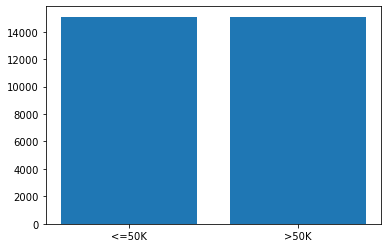

In [82]:
plt.bar(counter.keys(),counter.values())

In [83]:
#Standardisation
scale=StandardScaler()
X=scale.fit_transform(x)

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=24) # 80% training and 20% test

## Logistic Regression

In [85]:
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)
logmodel.score(X_test,Y_test)


0.7000165645188007

## SVM

In [86]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
print('Accuracy on training data is:',svc.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.7019091398517414
Accuracy is: 0.7091270498592016
Precision is: 0.7214045874985222
Recall is: 0.7091270498592016
f1 score is: 0.7041628391292191
              precision    recall  f1-score   support

       <=50K       0.77      0.58      0.66      2974
        >50K       0.67      0.83      0.74      3063

    accuracy                           0.71      6037
   macro avg       0.72      0.71      0.70      6037
weighted avg       0.72      0.71      0.70      6037

[[1727 1247]
 [ 509 2554]]


### Decision Tree Classifier

In [87]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
Y_pred=dt_model.predict(X_test)
print('Accuracy on training data is:',svc.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.7019091398517414
Accuracy is: 0.807023355971509
Precision is: 0.8073347432490492
Recall is: 0.807023355971509
f1 score is: 0.8069056787822617
              precision    recall  f1-score   support

       <=50K       0.82      0.79      0.80      2974
        >50K       0.80      0.83      0.81      3063

    accuracy                           0.81      6037
   macro avg       0.81      0.81      0.81      6037
weighted avg       0.81      0.81      0.81      6037

[[2336  638]
 [ 527 2536]]


## KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
n_neighbors=np.arange(2,18)
for i in n_neighbors:
  knn_model=KNeighborsClassifier(n_neighbors=i,metric='minkowski')
  knn_model.fit(X_train,Y_train)
  Y_pred=knn_model.predict(X_test)
  acc=accuracy_score(Y_test,Y_pred)
  acc_values.append(acc)

Text(0, 0.5, 'Accuracy values')

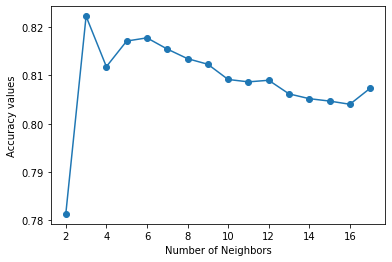

In [89]:
plt.plot(n_neighbors,acc_values,'o-')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy values')

In [90]:
knn_model=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
knn_model.fit(X_train,Y_train)
Y_pred=knn_model.predict(X_test)
print('Accuracy on training data is:',knn_model.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.887398020458028
Accuracy is: 0.8222627132681796
Precision is: 0.8252449981326878
Recall is: 0.8222627132681796
f1 score is: 0.8216878248477
              precision    recall  f1-score   support

       <=50K       0.86      0.77      0.81      2974
        >50K       0.80      0.87      0.83      3063

    accuracy                           0.82      6037
   macro avg       0.83      0.82      0.82      6037
weighted avg       0.83      0.82      0.82      6037

[[2287  687]
 [ 386 2677]]


## RANDOM FOREST

In [91]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,Y_train)
Y_pred=rf_model.predict(X_test)
print('Accuracy on training data is:',rf_model.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.963349484408001
Accuracy is: 0.8441278780851417
Precision is: 0.8452336128960088
Recall is: 0.8441278780851417
f1 score is: 0.8439184485136165
              precision    recall  f1-score   support

       <=50K       0.86      0.81      0.84      2974
        >50K       0.83      0.88      0.85      3063

    accuracy                           0.84      6037
   macro avg       0.85      0.84      0.84      6037
weighted avg       0.85      0.84      0.84      6037

[[2413  561]
 [ 380 2683]]


## GRADIENT BOOSTING

In [92]:
gb = GradientBoostingClassifier()
gb.fit(X_train,Y_train)
Y_pred = gb.predict(X_test)
print('Accuracy on training data is:',rf_model.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.963349484408001
Accuracy is: 0.8220970680801722
Precision is: 0.8245402238348742
Recall is: 0.8220970680801722
f1 score is: 0.8216097966057216
              precision    recall  f1-score   support

       <=50K       0.85      0.77      0.81      2974
        >50K       0.80      0.87      0.83      3063

    accuracy                           0.82      6037
   macro avg       0.82      0.82      0.82      6037
weighted avg       0.82      0.82      0.82      6037

[[2300  674]
 [ 400 2663]]


In [93]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8151399701838662

## Model prediction Accuracy table

In [94]:
from tabulate import tabulate

In [102]:
table = [['Model', 'Accuracy'], ['Logistic Regression',70.00], ['KNN',82.22],['Decision tree',80.70],['Random Forest',84.41],['Gradient Boost',82.20],['SVM',70.91]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │      70    │
├─────────────────────┼────────────┤
│ KNN                 │      82.22 │
├─────────────────────┼────────────┤
│ Decision tree       │      80.7  │
├─────────────────────┼────────────┤
│ Random Forest       │      84.41 │
├─────────────────────┼────────────┤
│ Gradient Boost      │      82.2  │
├─────────────────────┼────────────┤
│ SVM                 │      70.91 │
╘═════════════════════╧════════════╛


From the selected models,Random Forest Algorithm gives the best accuracy of 84.41%.so we have to save the model for better prediction

In [96]:
df

,age,workclass,education,marital,occupation,relationship,race,sex,hours_per_week,country
0,39,6,5,2,0,1,4,1,40,38
2,38,3,2,0,5,1,4,1,40,38
3,53,3,4,1,5,0,2,1,40,38
4,28,3,5,1,9,5,2,0,40,4
5,37,3,1,1,3,5,4,0,40,38
...,...,...,...,...,...,...,...,...,...,...
32555,22,3,3,2,10,1,4,1,40,38
32556,27,3,3,1,12,5,4,0,38,38
32557,40,3,2,1,6,0,4,1,40,38
32558,58,3,2,2,0,4,4,0,40,38


In [97]:
# save the model
import pickle
filename = 'model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

In [98]:
load_model = pickle.load(open(filename,'rb'))

In [99]:
load_model.predict([[52,4,11,2,3,5,4,0,40,38]])

array(['>50K'], dtype=object)

In [100]:
load_model.predict([[40,3,11,2,6,0,4,1,40,38]])

array(['<=50K'], dtype=object)

In [101]:
load_model.predict([[38,3,2,0,5,1,4,1,40,38]])

array(['<=50K'], dtype=object)